In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [5]:
X_selected = pd.read_csv('../data/heart_disease_selected_features.csv')
y = pd.read_csv('../data/heart_disease.csv')['target']

In [6]:
inertias = []
sil_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_selected, kmeans.labels_))

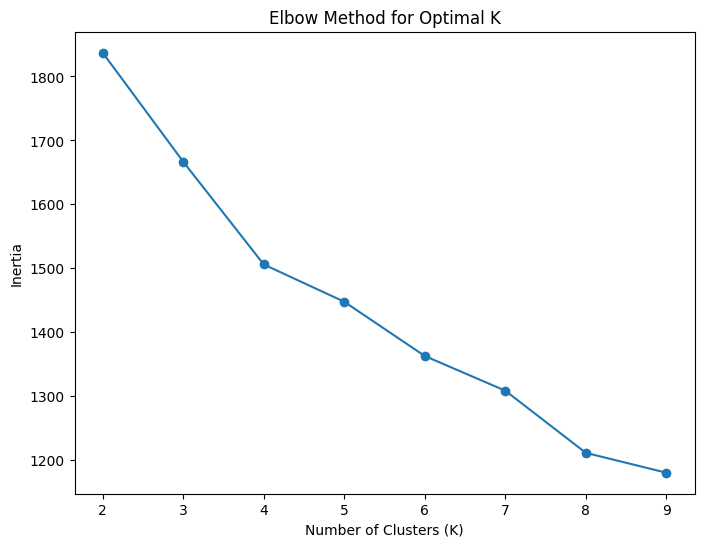

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [8]:
optimal_k = K[np.argmax(sil_scores)]
print(f"Optimal number of clusters: {optimal_k}")
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_selected)

Optimal number of clusters: 2


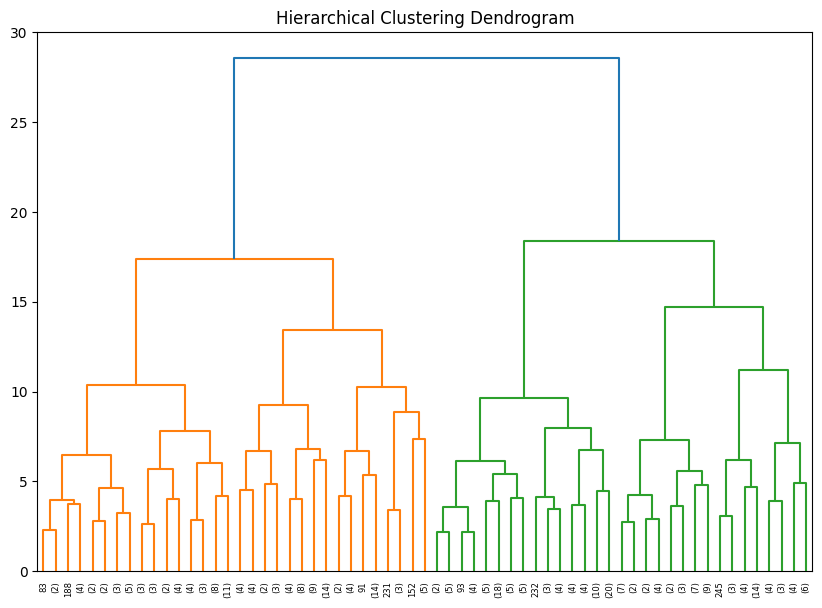

In [9]:
linked = linkage(X_selected, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [10]:
clustering_results = pd.DataFrame({
    'KMeans_Labels': kmeans_labels,
    'True_Labels': y
})

clustering_results.to_csv('../results/clustering_results.csv', index=False)